In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Rent Data.csv')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


# Come to the point

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.tail()

,area,rent
24,2800,50000
25,3100,53000
26,2750,48000
27,1800,25000
28,2200,31460


In [5]:
df.shape

(29, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    29 non-null     int64
 1   rent    29 non-null     int64
dtypes: int64(2)
memory usage: 592.0 bytes


In [7]:
#accessing area column
df.area

0     2000
1     2100
2     2500
3     2250
4     3000
5     1900
6     1500
7     1850
8     2700
9     2100
10    2150
11    2100
12    2100
13    2510
14    2250
15    3100
16    1800
17    1550
18    1800
19    2700
20    2110
21    2100
22    3500
23    1200
24    2800
25    3100
26    2750
27    1800
28    2200
Name: area, dtype: int64

In [8]:
df['area']

0     2000
1     2100
2     2500
3     2250
4     3000
5     1900
6     1500
7     1850
8     2700
9     2100
10    2150
11    2100
12    2100
13    2510
14    2250
15    3100
16    1800
17    1550
18    1800
19    2700
20    2110
21    2100
22    3500
23    1200
24    2800
25    3100
26    2750
27    1800
28    2200
Name: area, dtype: int64

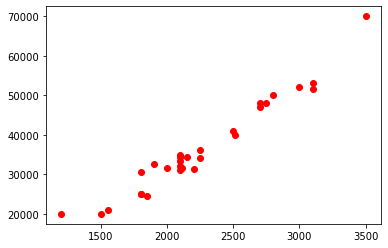

In [9]:
plt.scatter(df.area, df.rent, color='red')

Text(0, 0.5, 'Rent in BDT')

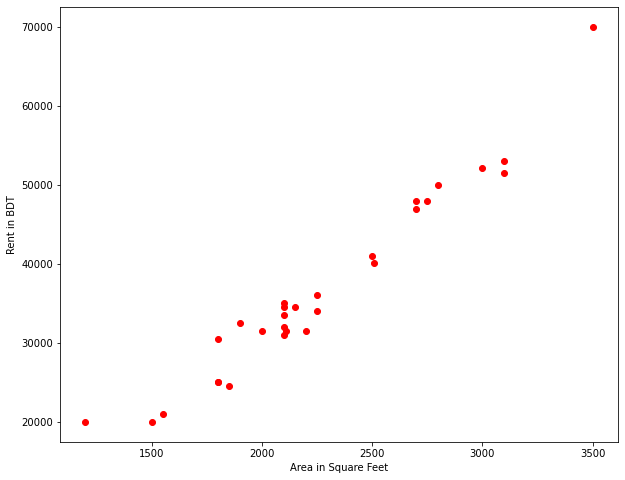

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(df.area, df.rent, color='red')
plt.xlabel('Area in Square Feet')
plt.ylabel('Rent in BDT')

In [11]:
#Sep x,y
x = df.drop('rent',axis=1) # x = df[['area']]

In [12]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [13]:
y = df.rent
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

Text(0, 0.5, 'Rent in BDT')

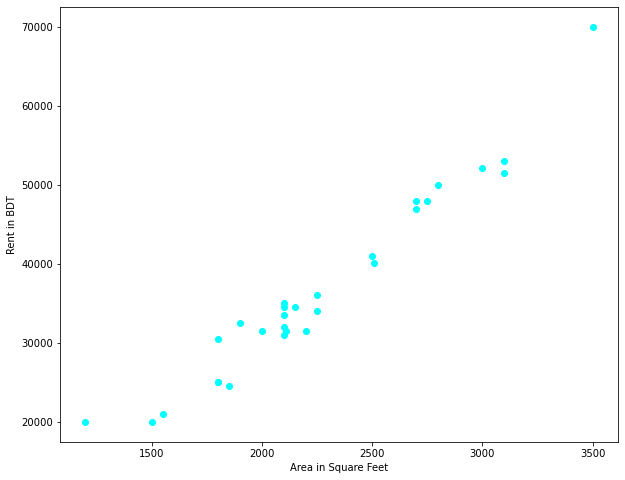

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(x, y, color='cyan')
plt.xlabel('Area in Square Feet')
plt.ylabel('Rent in BDT')

In [15]:
# validate training and testing data
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y,test_size=.30,random_state=42) # ,random_state=1

In [17]:
xtrain.head()

,area
13,2510
15,3100
11,2100
17,1550
1,2100


In [18]:
ytrain.head()

13    40050
15    51500
11    32000
17    21000
1     35000
Name: rent, dtype: int64

In [19]:
xtest.shape

(9, 1)

In [20]:
xtrain.shape

(20, 1)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression() #creating obj for linear reg

In [23]:
#training linear regression model with train data
reg.fit(xtrain,ytrain)

LinearRegression()

In [24]:
m=reg.coef_
m

array([19.86671162])

In [25]:
c=reg.intercept_
c

-8754.300392865101

In [26]:
#y=mx+c
y = (2000*m)+c
y

array([30979.12283782])

In [27]:
#y=mx+c
y = (3700*m)+c
y

array([64752.5325839])

In [28]:
reg.predict([[3700]])

array([64752.5325839])

In [29]:
x.mean()

area    2259.310345
dtype: float64

In [30]:
y.mean()

64752.53258389821

In [31]:
reg.predict(xtest)

array([27005.78051475, 27005.78051475, 32965.79399935, 60779.19026083,
       44885.82096856, 32965.79399935, 32965.79399935, 30979.12283782,
       45879.15654932])

In [32]:
reg.predict(x)

array([30979.12283782, 32965.79399935, 40912.47864549, 35945.80074165,
       50845.83445316, 28992.45167628, 21045.76703015, 27999.11609552,
       44885.82096856, 32965.79399935, 33959.12958012, 32965.79399935,
       32965.79399935, 41111.14576164, 35945.80074165, 52832.50561469,
       27005.78051475, 22039.10261091, 27005.78051475, 44885.82096856,
       33164.46111551, 32965.79399935, 60779.19026083, 15085.75354554,
       46872.49213009, 52832.50561469, 45879.15654932, 27005.78051475,
       34952.46516089])

In [33]:
df['Predicted Rent'] = reg.predict(x)
df.head()

,area,rent,Predicted Rent
0,2000,31500,30979.122838
1,2100,35000,32965.793999
2,2500,41050,40912.478645
3,2250,36100,35945.800742
4,3000,52100,50845.834453


Text(0, 0.5, 'Rent in BDT')

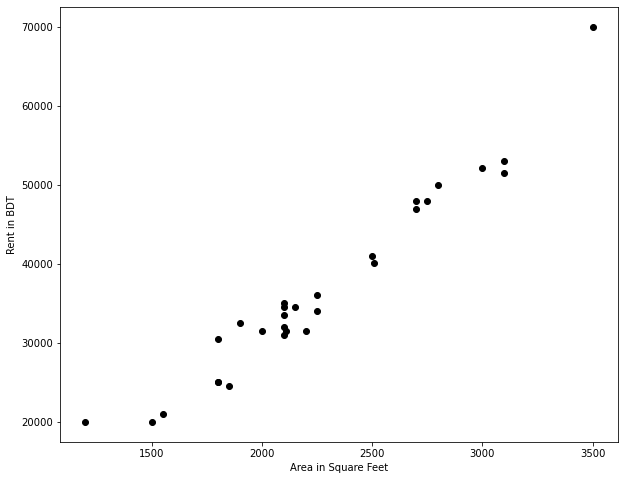

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(df.area, df.rent, color='black')
plt.xlabel('Area in Square Feet')
plt.ylabel('Rent in BDT')

# Best Fit Line

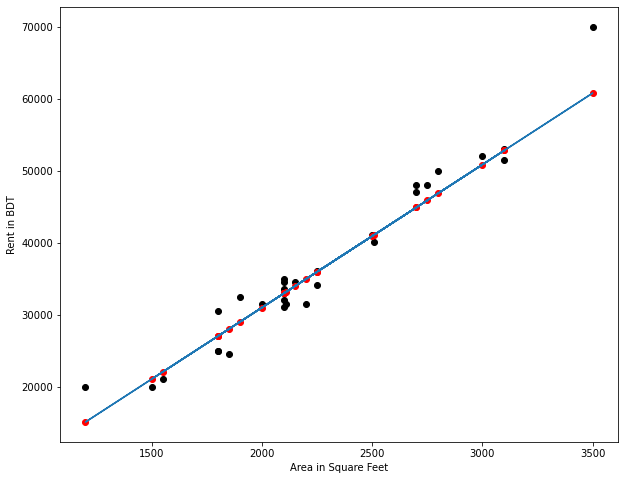

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(df.area, df.rent, color='black')
plt.xlabel('Area in Square Feet')
plt.ylabel('Rent in BDT')
plt.plot(df.area, df['Predicted Rent'])
plt.scatter(df.area, df['Predicted Rent'],color='red')

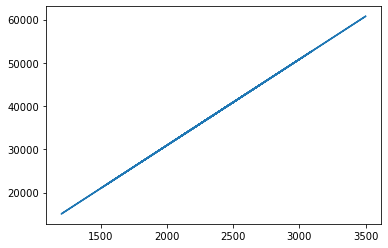

In [36]:
plt.plot(df.area, df['Predicted Rent'])

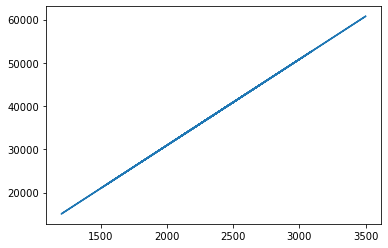

In [37]:
plt.plot(df.area, reg.predict(x)) # predicted y, df.predict(x)

In [38]:
reg.score(xtest, ytest) #testing accuracy

0.921744133304477

In [39]:
pred_y = reg.predict(xtest)
pred_y

array([27005.78051475, 27005.78051475, 32965.79399935, 60779.19026083,
       44885.82096856, 32965.79399935, 32965.79399935, 30979.12283782,
       45879.15654932])

In [40]:
ytest

27    25000
16    30500
12    34500
22    70000
8     48000
9     31000
21    33500
0     31500
26    48000
Name: rent, dtype: int64

In [41]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, pred_y)
mse

13580774.298011921

In [42]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(ytest, pred_y)
mse

2723.435042679973

# Save ML Models

In [43]:
#save trained model using pickle
import pickle as pk
with open('My_LR1','wb') as files: #save ml model
    pk.dump(reg, files)

In [44]:
with open('My_LR1','rb') as files: #import saved model
    reg1 = pk.load(files)

In [45]:
reg1.predict([[2500]]) #saved

array([40912.47864549])

In [46]:
reg.predict([[2500]])

array([40912.47864549])

In [47]:
#easy way using pikle
pk.dump(reg,open('My_LR2','wb'))

In [48]:
reg3 = pk.load(open('My_LR2','rb'))

In [49]:
reg3.predict([[2500]])

array([40912.47864549])

# Save model using Joblib

In [50]:
import joblib
joblib.dump(reg,'ML4')

['ML4']

In [51]:
reg4  = jb.load('ML4')
reg4

NameError: name 'jb' is not defined

In [ ]:
reg4.predict([[2500]]) 

In [ ]:
reg4.predict([[3700]])

In [ ]:
Y = m*3700 + c
Y